In [1]:
import sys
sys.path.insert(0,'../')
from collections import OrderedDict
import numpy as np
import numpy.linalg as llg
from scipy.optimize import minimize
import matplotlib.pylab as pl
from sklearn.model_selection import train_test_split

In [2]:
k = 2  # 学生能力维度
m = 400  # 学生数
n = 10

In [3]:
fogells = np.random.uniform(0, 1, (100, 2))

In [4]:
mclovins = np.random.uniform(2, 3, (100, 2))

In [5]:
seths = mclovins - np.array([0, 2])

In [6]:
evans = mclovins - np.array([2, 0])

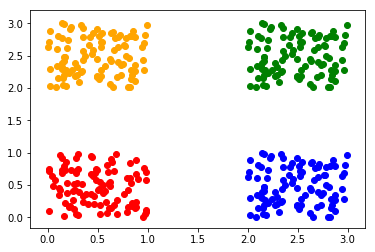

In [7]:
color = ['red','blue','orange','green']
pl.scatter(fogells[:,0], fogells[:,1],c=color[0],label=color)
pl.scatter(seths[:,0], seths[:,1],c=color[1],label=color)
pl.scatter(evans[:,0], evans[:,1],c=color[2],label=color)
pl.scatter(mclovins[:,0], mclovins[:,1],c=color[3],label=color)
pl.show()

In [8]:
from lse_model import LSEModel

In [9]:
lsee = LSEModel()

In [10]:
s = np.concatenate((fogells, mclovins, seths, evans), axis=0)
s.shape

(400L, 2L)

In [11]:
a = np.random.normal(1.5, 0.5, (k, n))
a[a < 0.0001] = 0.0001

In [12]:
q = np.array([0.5, 0.5])

In [13]:
l = np.array([1.0, 1.0])

In [14]:
u = np.zeros((m, n))
norm_a = llg.norm(a, axis=0).reshape(1, -1)
dots = np.dot(s, a)
delta = lsee.vec_delta(dots, norm_a)
p = lsee.prob(delta)
rand = np.random.random(p.shape)
u[rand < p] = 1.0
u[rand >= p] = 0.0
u.shape

(400L, 10L)

In [15]:
lsee.assessment_likelihood_fun(s, a, u)

-2300.1347496716849

In [16]:
s1 = s + 0.2

In [17]:
lsee.assessment_likelihood_fun(s, a, u)
s1 = s + 0.2
lsee.lesson_gain_likelihood_fun(s, l, q, s1, 1)

(400L, 1L) (1L, 2L)
mu (400L, 2L)
sigma (400L, 400L)
llg.inv(sigma_matrix) (400L, 400L)


538.30845302020839